# Introduction:

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

# Objective :
* Predict whether the Employee of an Organization should get Promotion or Not?


# Import Libraries

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)

# setting up the style of the plot
plt.style.use('fivethirtyeight')

# Importing Dataset

In [2]:
df = pd.read_csv('employee_promotion.csv')

In [3]:
# First 5 rows of the dataset
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
# Shape of the dataset
df.shape

(54808, 14)

In [5]:
 # Informtaion of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Observations:
* There are some missing valuesin the Education and Previous year ratings column
* Most of the columns are of integer type.

In [6]:
df.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

There are 4 percent missing vaue in education column and 7 percent in previous year ratings.

In [7]:
# Finding number of unique number of elements in each columns.
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [8]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [9]:

# Dropping some unneccesary columns
df.drop(['employee_id','region'],axis = 1,inplace = True)

In [10]:
# Rename some columns
df.rename(columns = {'awards_won?':'awards_won'},inplace = True)

In [11]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  50684 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


In [13]:
df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [14]:
# Impute Missing Values in education column
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [15]:
df['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [16]:
# Impute Missing Values in previous_year_rating column
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [17]:
# Change the data type of previous_year_rating coumn
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [18]:
# Replace the values in gender columns
df['gender']=df['gender'].replace({'f':'Female','m':'Male'})

In [19]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


## Univariate Analysis

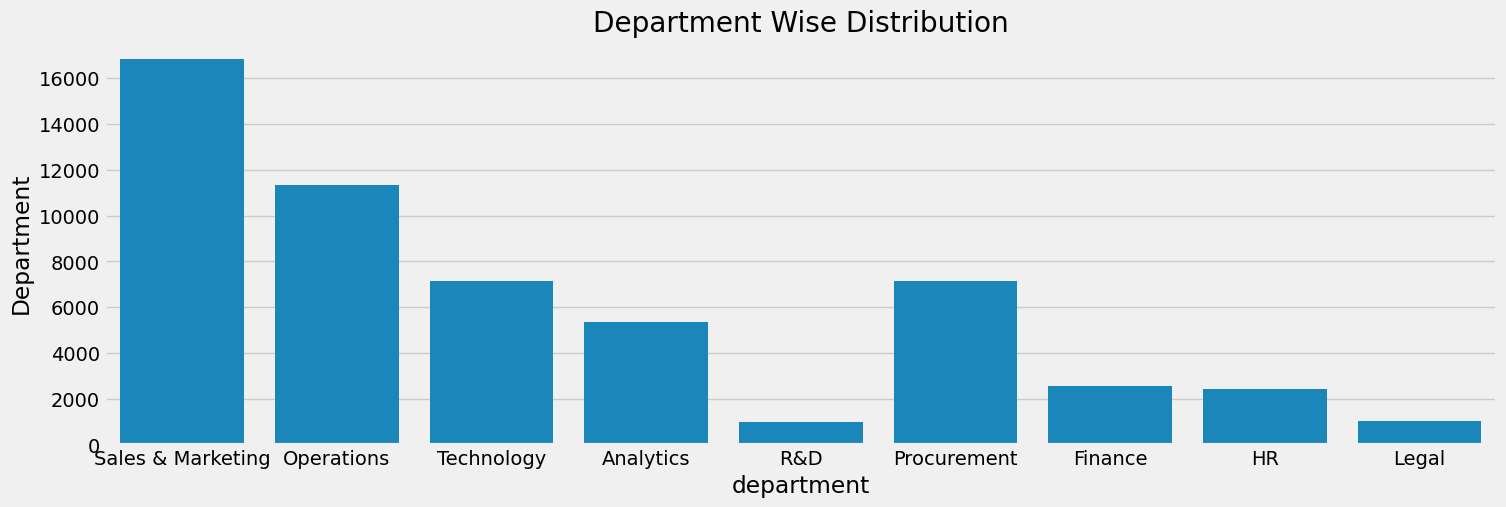

In [20]:
# Visualising the Department column :

plt.title("Department Wise Distribution")
sns.countplot(x = df['department'])
plt.ylabel("Department")
plt.show()


* Sales and Marketing department have maximum empployees.
* Legal and R&D have least employees.

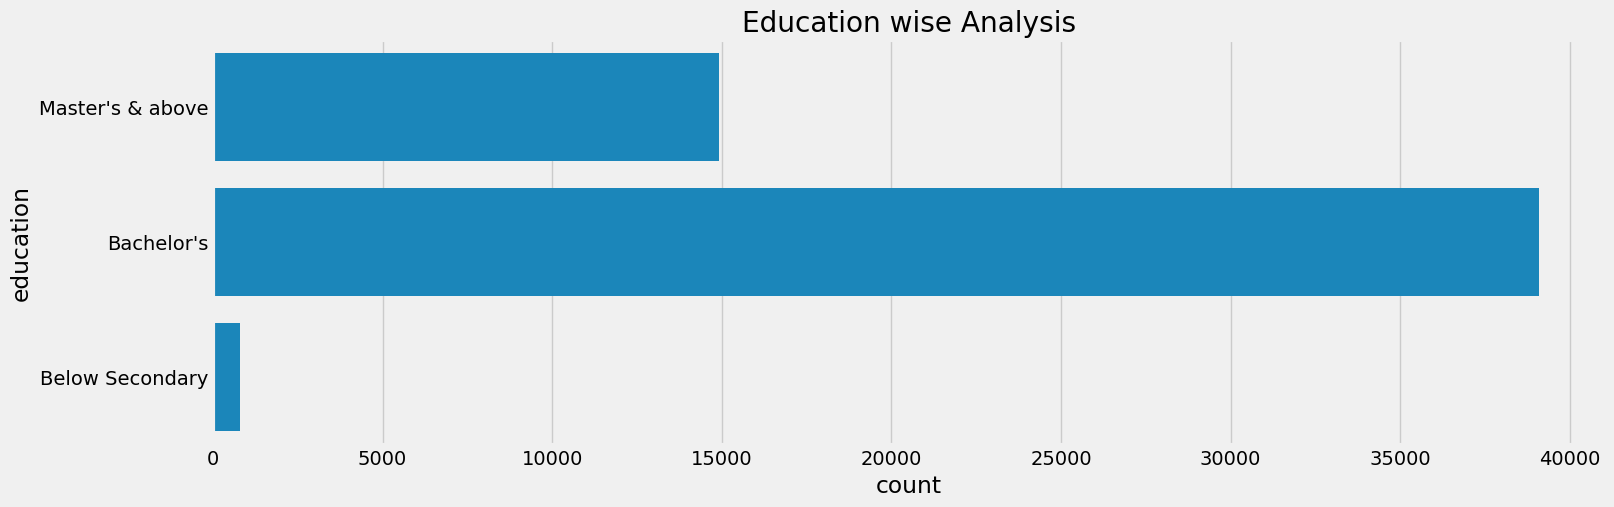

In [21]:
# Visualising the Education column :
plt.title("Education Wise Distribution")
sns.countplot(df['education'])
plt.title("Education wise Analysis")
plt.show()

In [22]:
df['education'].value_counts(normalize=True)

education
Bachelor's          0.712998
Master's & above    0.272314
Below Secondary     0.014688
Name: proportion, dtype: float64

* More than 70 per cent of the people have Bachelors Degree
* 27 percent of the Employee have Mater's Degree.
* Less than 2 percent have Below Secondary Degree

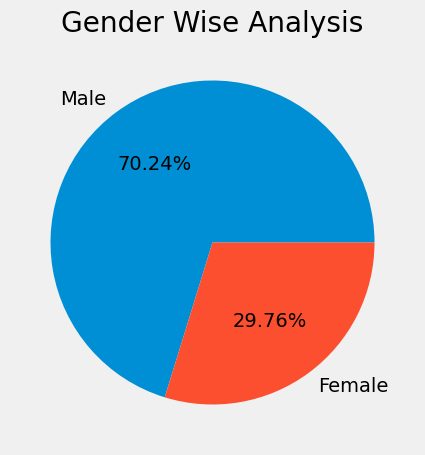

In [23]:
# Visualising the Gender column :
index=df["gender"].value_counts().index
labels=df["gender"].value_counts().values
plt.pie(labels,labels=index,autopct='%1.2f%%')
plt.title("Gender Wise Analysis")
plt.show()

* 70 per cent of the Employee is Male
* 30 per cent of the Employee is Female

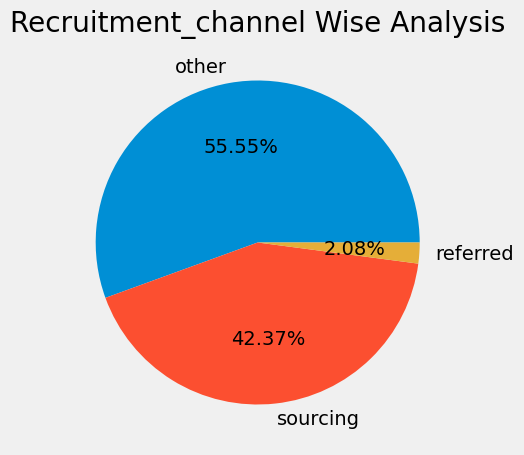

In [24]:
# Visualising the recruitment_channel column :
index=df["recruitment_channel"].value_counts().index
labels=df["recruitment_channel"].value_counts().values
plt.pie(labels,labels=index,autopct='%1.2f%%')
plt.title("Recruitment_channel Wise Analysis")
plt.show()

* 56 per cent of the Recruitment_channel is Other
* 2 per cent of the Recruitment_channel is through Referrence

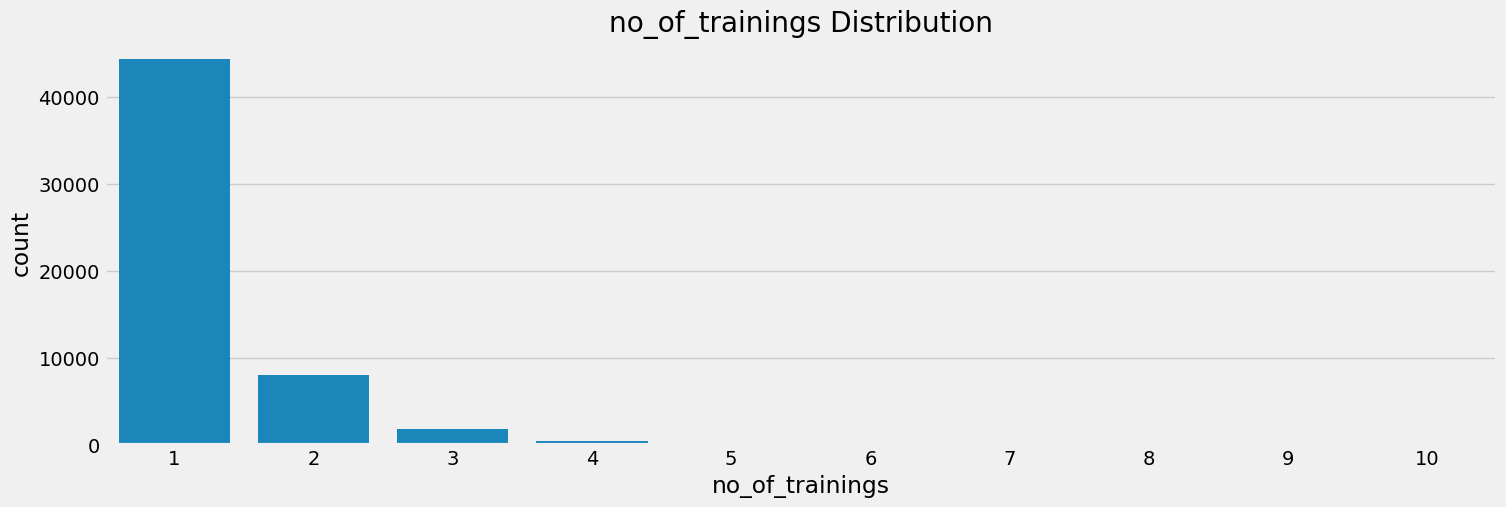

In [25]:
# Visualising the no_of_trainings column :
plt.title("no_of_trainings Distribution")
sns.countplot(x = df['no_of_trainings'])
plt.show()

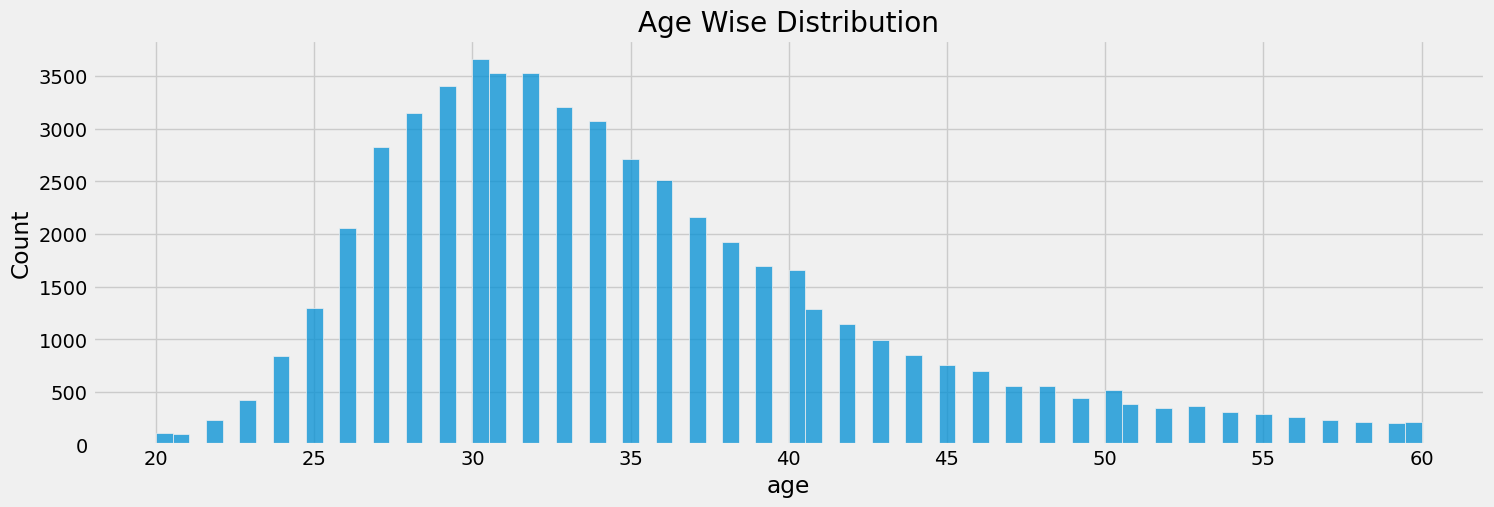

In [26]:
# Visualising the age column :
plt.title("Age Wise Distribution")
sns.histplot(df['age'])
plt.show()

* Most of the Employess are in between 25-40.

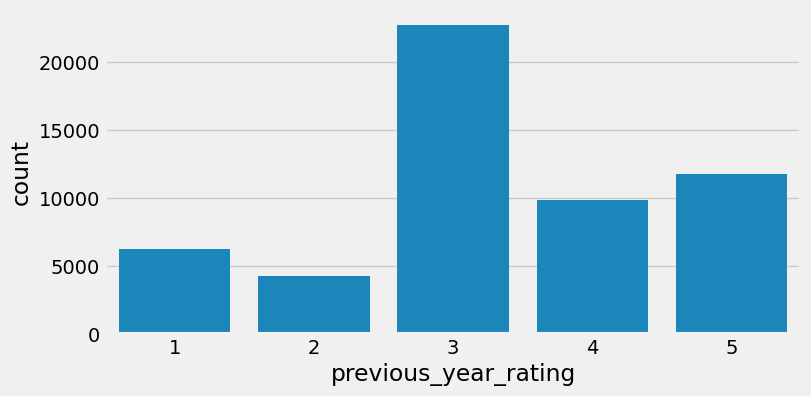

In [27]:
# Visualising the previous_year_rating column :

plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x = df['previous_year_rating'])
plt.show()

* Most of the employess have average previous year rating of 3
* Least of the employees have previous year rating of 2

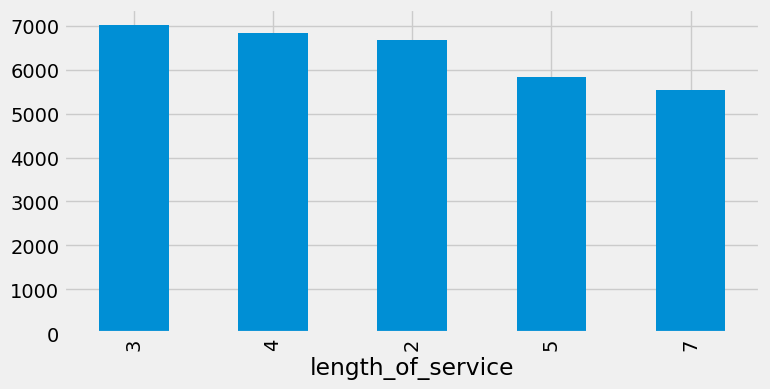

In [28]:
# Visualising the length_of_service column :
df['length_of_service'].value_counts()[:5].plot(kind="bar")
plt.show()

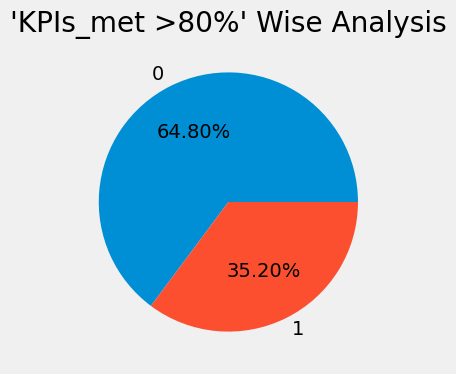

In [29]:
# Visualising the KPIs_met >80% column :

index=df['KPIs_met >80%'].value_counts().index
labels=df['KPIs_met >80%'].value_counts().values
plt.pie(labels,labels=index,autopct='%1.2f%%')
plt.title("'KPIs_met >80%' Wise Analysis")
plt.show()

* More than 60 per cent of the employess have met 'KPIs_met >80%'.

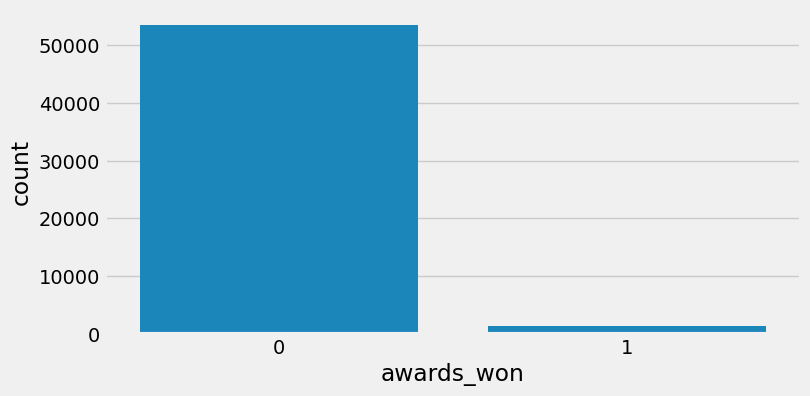

In [30]:
# Visualising the awards_won column :

sns.countplot(x = df['awards_won'])
plt.show()

In [31]:
df['awards_won'].value_counts(normalize=True)

awards_won
0    0.976828
1    0.023172
Name: proportion, dtype: float64

* Less than 3 percent of the Employees have won the Award.

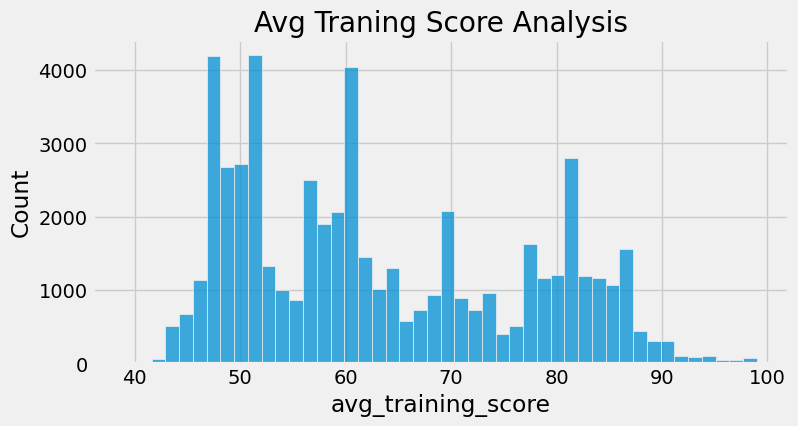

In [32]:
# Visualising the avg_training_score column :

sns.histplot(df['avg_training_score'])
plt.title("Avg Traning Score Analysis")
plt.show()

In [33]:
df["avg_training_score"].value_counts().sort_values(ascending=False)[:15]

avg_training_score
50    2716
49    2681
48    2437
51    2347
60    2155
59    2064
58    1898
61    1879
52    1856
47    1746
62    1450
82    1447
57    1437
81    1357
53    1324
Name: count, dtype: int64

* Many of the employees have scored avg_training_score in between 47-51
* Very less people have scored 100 marks .

## Bivariate Analysis

In [34]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


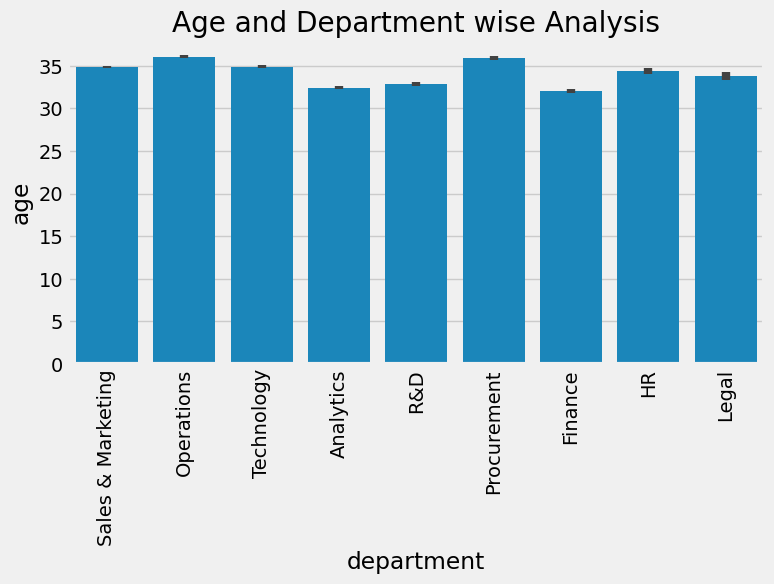

In [35]:
# Age and Department wise Analysis
plt.title("Age and Department wise Analysis")
sns.barplot(x = 'department', y = 'age', data = df)
plt.xticks(rotation = 90)
plt.show()

* Averge age of Employee is minimum in Finance, R& D, Analytics.

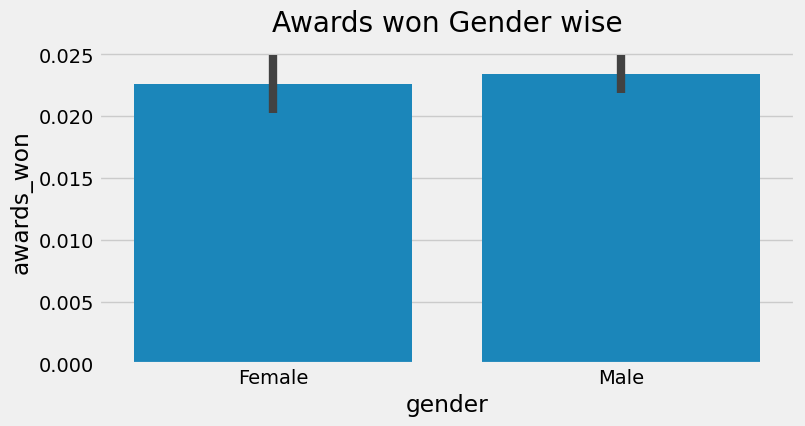

In [36]:
# Awards won Gender wise :
plt.title("Awards won Gender wise")
sns.barplot(y = 'awards_won', x = 'gender', data = df)
plt.show()

* Male has won the more awards as compared to female

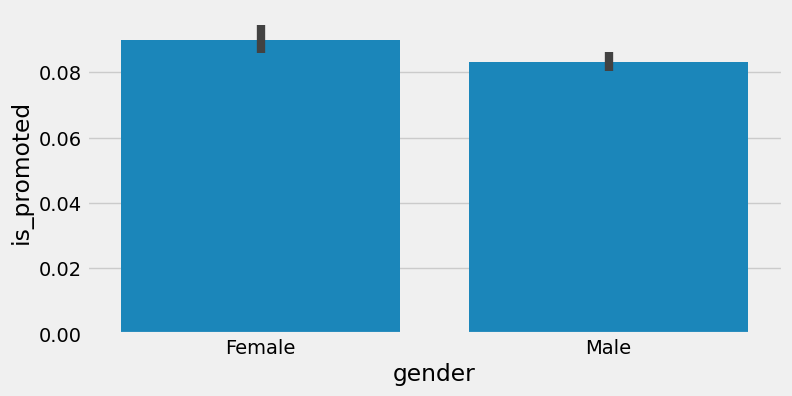

In [37]:
# Lets compare the Gender Gap in the promotion

sns.barplot(x = 'gender', y = 'is_promoted', data = df)
plt.show()

In [38]:
# Lets compare the Gender Gap in the promotion

df[['is_promoted','gender']].groupby(['gender','is_promoted']).size()

gender  is_promoted
Female  0              14845
        1               1467
Male    0              35295
        1               3201
dtype: int64

In [39]:

pd.crosstab(index = df.gender, columns = df.is_promoted,normalize="index")


is_promoted,0,1
gender,,
Female,0.910066,0.089934
Male,0.916849,0.083151


* Female promotion rate is slightly higher than men.

In [40]:
df['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

<Axes: xlabel='department'>

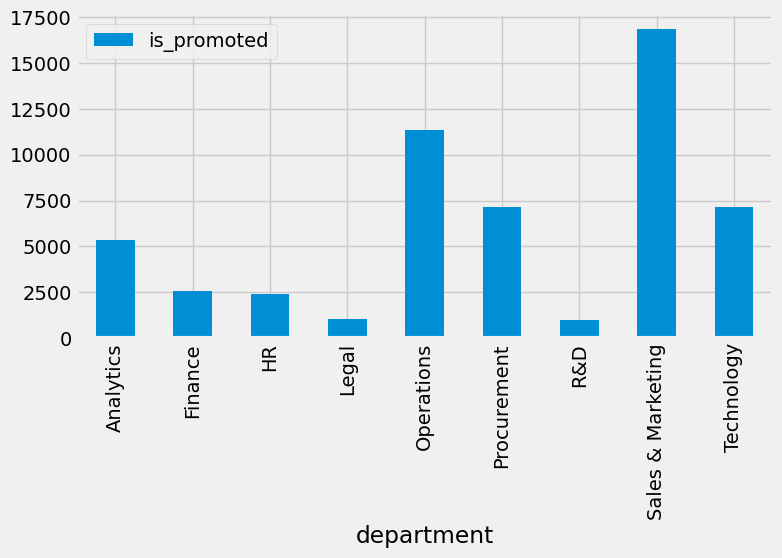

In [41]:
# lets compare the effect of different Departments and Promotion

df[['department','is_promoted']].groupby('department').count().plot(kind = 'bar')

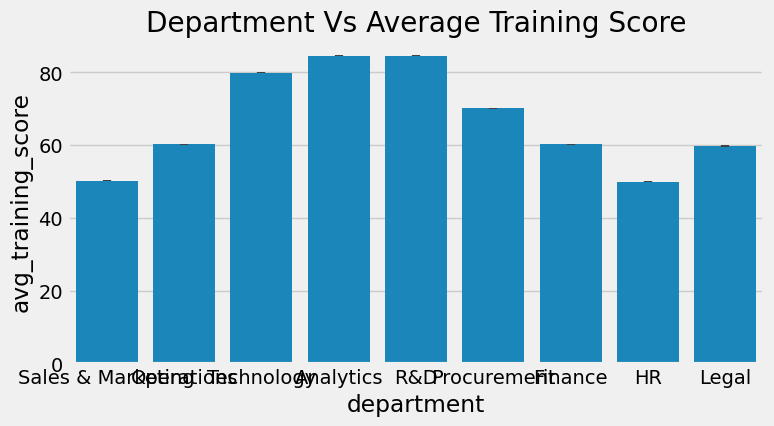

In [42]:
# Department Vs Average Training Score


sns.barplot(data=df,x="department",y="avg_training_score")
plt.title("Department Vs Average Training Score")
plt.show()

* Sales & Marketing ,Hr Department have least average traning score.
* Analytics and R&D Department have maximum average traning score.

##  Multivariate Analysis

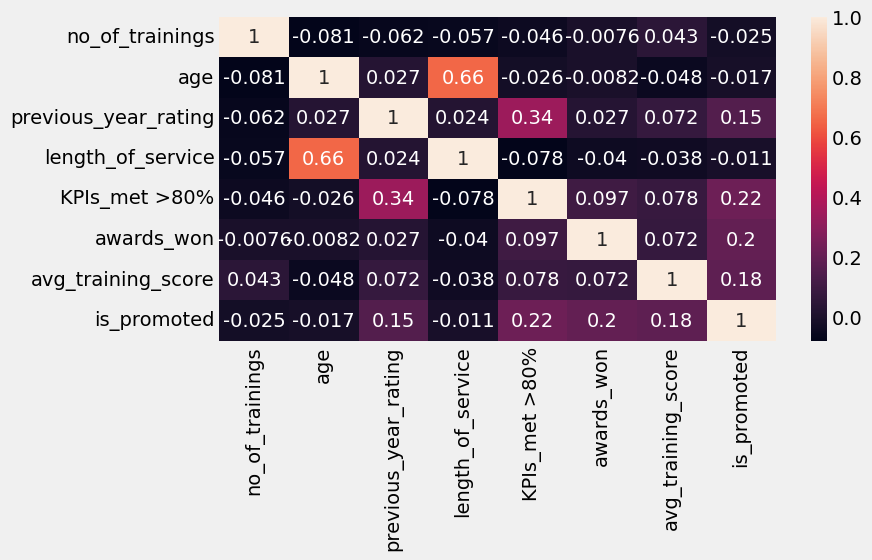

In [43]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot = True)
plt.show()

* Age and Length of Service have some high positive coreation.()
* KPI_MET 80 % and previous_year_ratings have some  positive corelation.


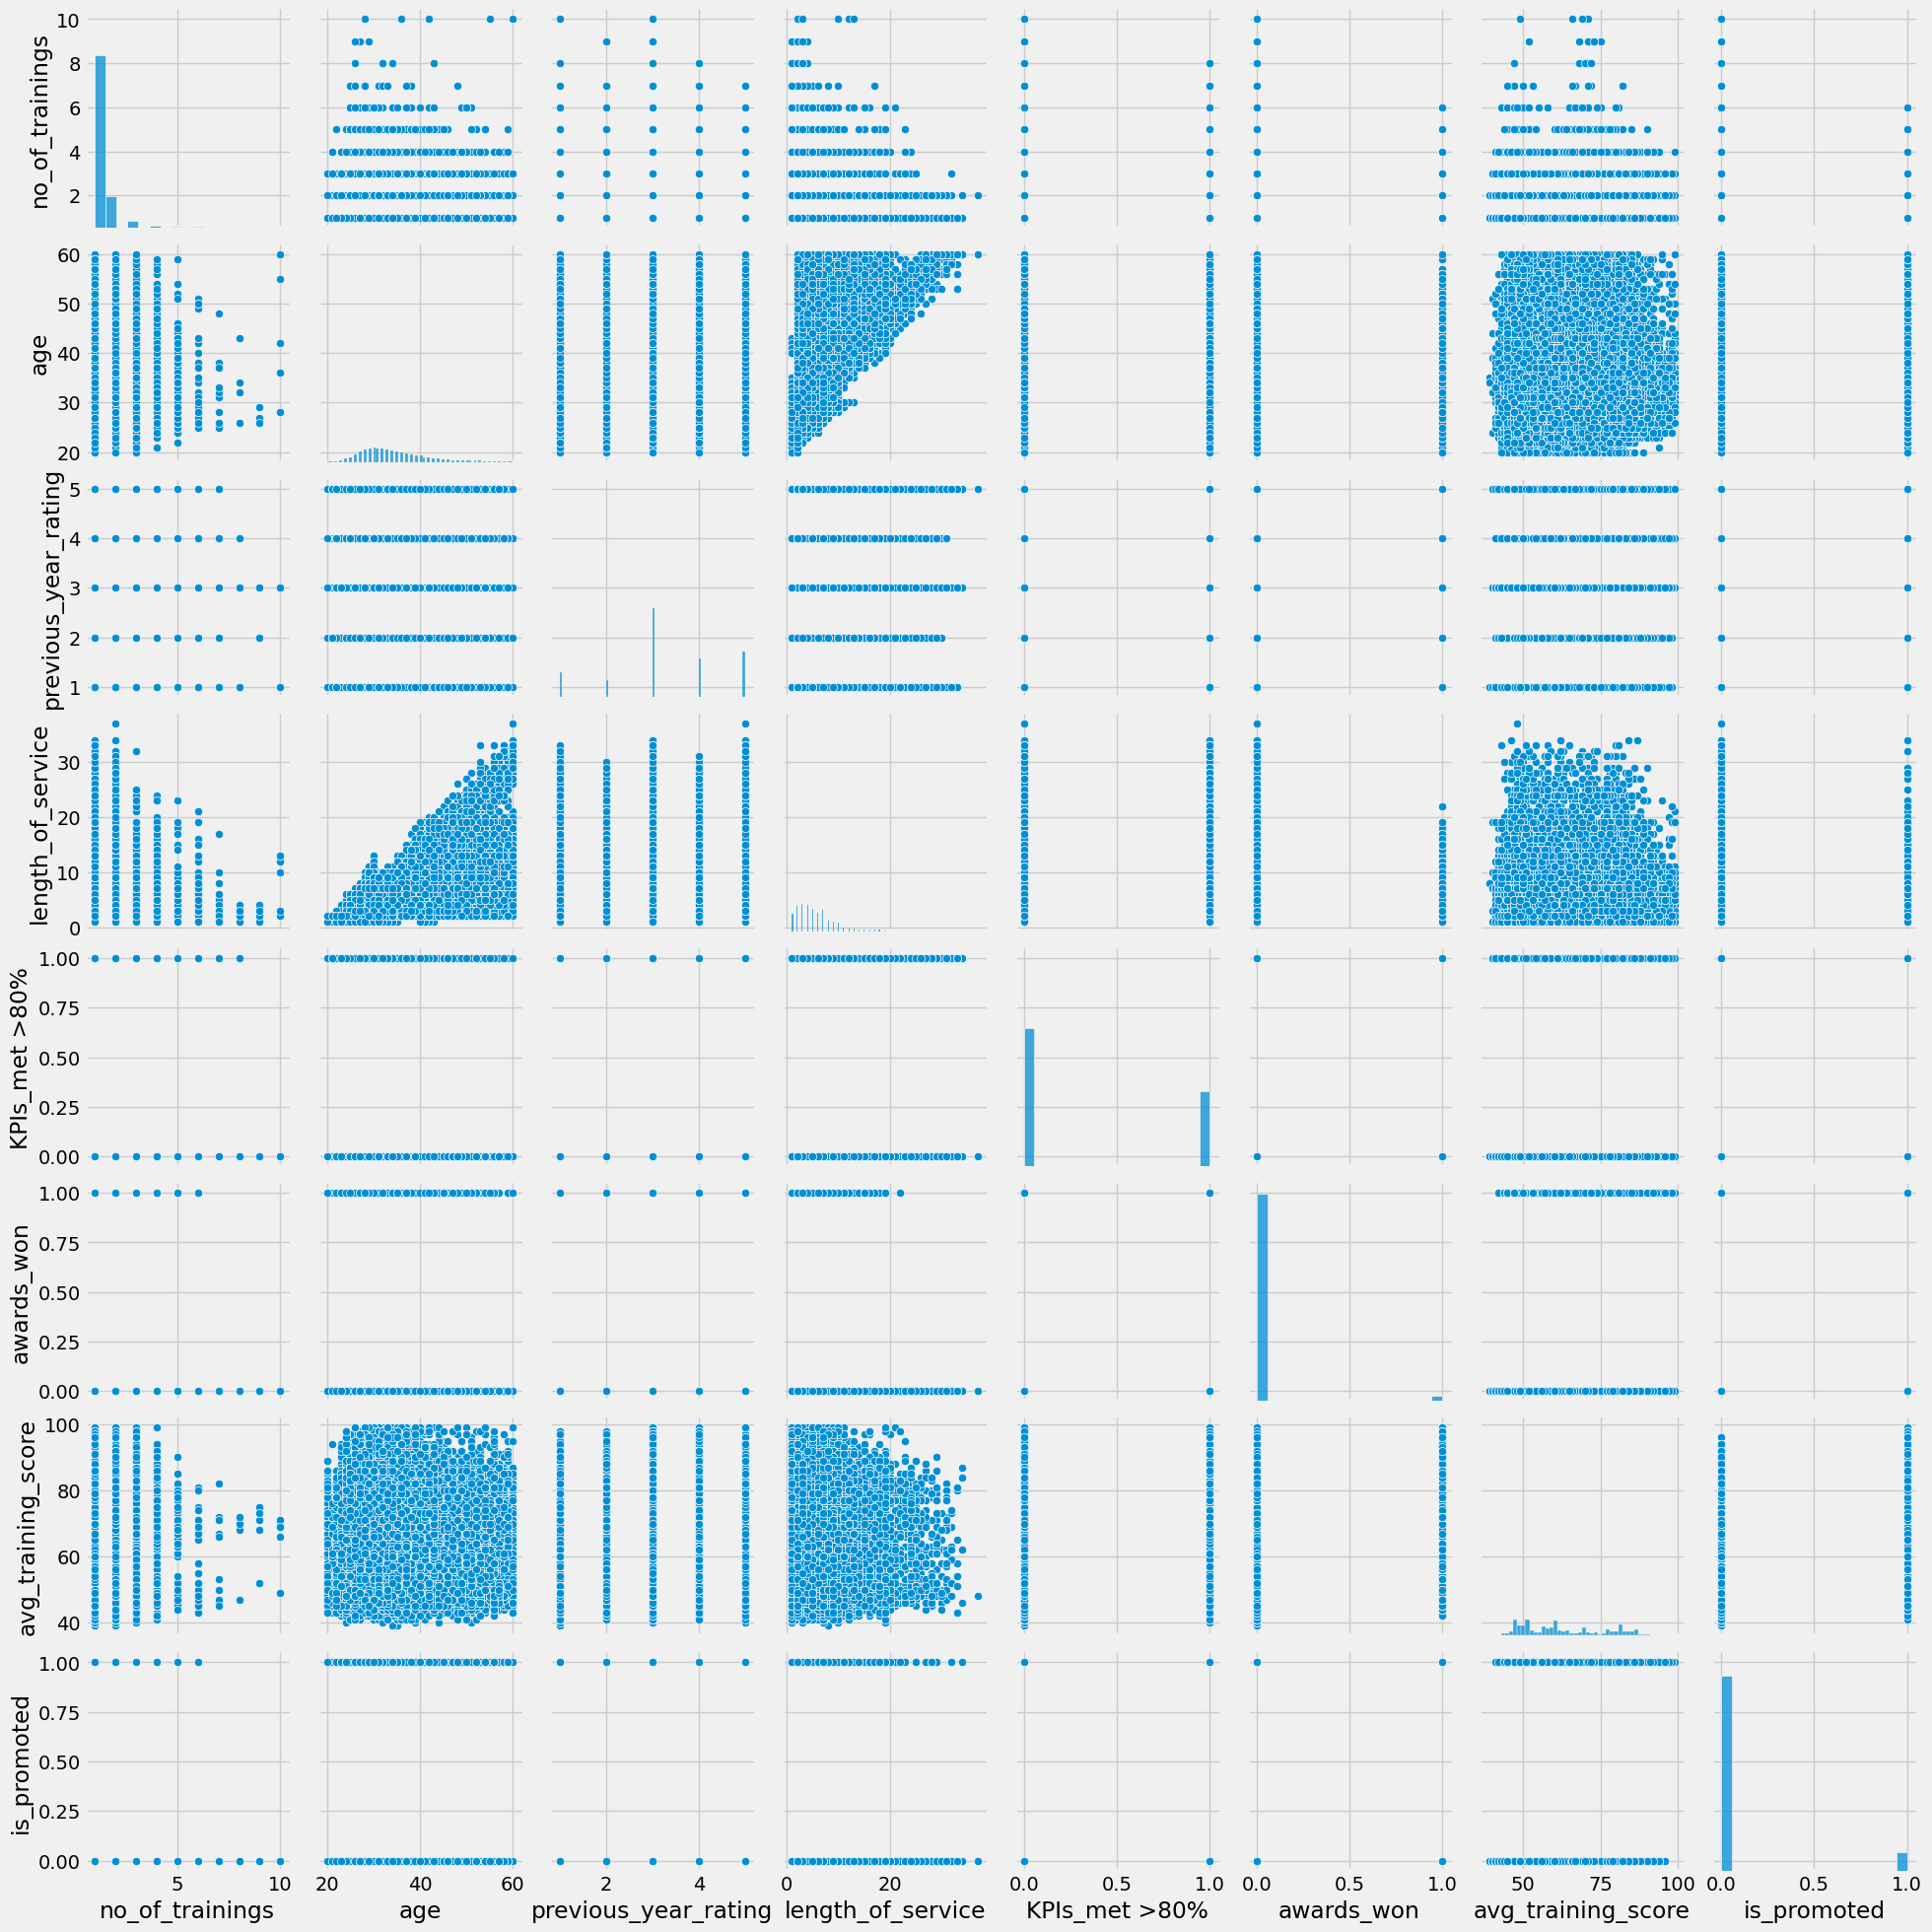

In [44]:
sns.pairplot(df)

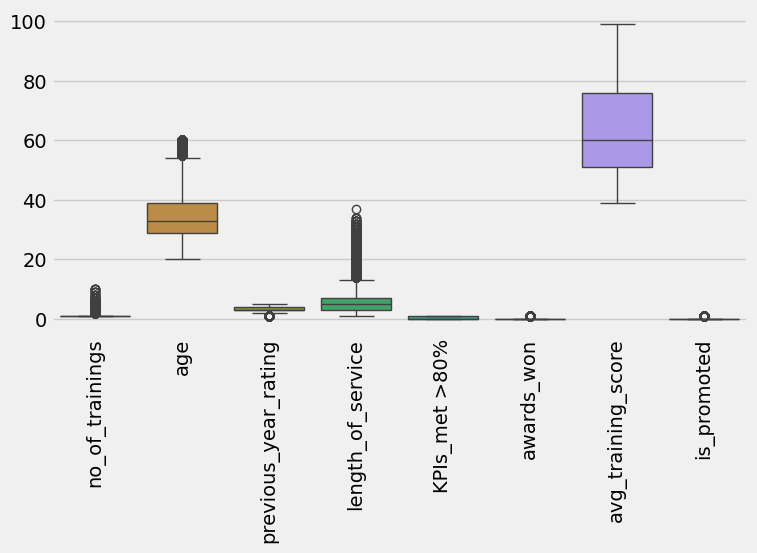

In [45]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

## Feature Engineering

In [46]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,Female,sourcing,1,35,5,8,1,0,49,0
1,Operations,Bachelor's,Male,other,1,30,5,4,0,0,60,0
2,Sales & Marketing,Bachelor's,Male,sourcing,1,34,3,7,0,0,50,0
3,Sales & Marketing,Bachelor's,Male,other,2,39,1,10,0,0,50,0
4,Technology,Bachelor's,Male,other,1,45,3,2,0,0,73,0


In [47]:
x = pd.get_dummies(df[['department','education','gender','recruitment_channel']],drop_first = True)
x

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,False,False,False,False,False,False,True,False,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,True,False,False,True,False,True
54804,False,False,False,True,False,False,False,False,False,True,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,True,False,False
54806,False,False,False,False,False,False,True,False,False,False,True,False,True


In [48]:
df.drop(['department','education','gender','recruitment_channel'],axis = 1, inplace = True)

In [49]:
df = pd.concat([df,x],axis = 1)
df

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,1,0,49,0,False,False,...,False,False,False,True,False,False,True,False,False,True
1,1,30,5,4,0,0,60,0,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1,34,3,7,0,0,50,0,False,False,...,False,False,False,True,False,False,False,True,False,True
3,2,39,1,10,0,0,50,0,False,False,...,False,False,False,True,False,False,False,True,False,False
4,1,45,3,2,0,0,73,0,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3,17,0,0,78,0,False,False,...,False,False,False,False,True,False,False,True,False,True
54804,1,37,2,6,0,0,56,0,False,False,...,True,False,False,False,False,False,True,False,False,False
54805,1,27,5,3,1,0,79,0,False,False,...,False,False,False,False,False,False,False,True,False,False
54806,1,29,1,2,0,0,45,0,False,False,...,False,False,False,True,False,False,False,True,False,True


In [50]:
x = df.drop('is_promoted',axis = 1)
y = df['is_promoted']

In [51]:
x

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_Male,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5,8,1,0,49,False,False,False,False,False,False,True,False,False,True,False,False,True
1,1,30,5,4,0,0,60,False,False,False,True,False,False,False,False,False,False,True,False,False
2,1,34,3,7,0,0,50,False,False,False,False,False,False,True,False,False,False,True,False,True
3,2,39,1,10,0,0,50,False,False,False,False,False,False,True,False,False,False,True,False,False
4,1,45,3,2,0,0,73,False,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3,17,0,0,78,False,False,False,False,False,False,False,True,False,False,True,False,True
54804,1,37,2,6,0,0,56,False,False,False,True,False,False,False,False,False,True,False,False,False
54805,1,27,5,3,1,0,79,False,False,False,False,False,False,False,False,False,False,True,False,False
54806,1,29,1,2,0,0,45,False,False,False,False,False,False,True,False,False,False,True,False,True


In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

# Feature Scailing

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [54]:
x

array([[-0.41527615,  0.02559817,  1.39576589, ..., -1.53622276,
        -0.14587586,  1.16635286],
       [-0.41527615, -0.62713488,  1.39576589, ...,  0.65094726,
        -0.14587586, -0.85737347],
       [-0.41527615, -0.10494844, -0.25065148, ...,  0.65094726,
        -0.14587586,  1.16635286],
       ...,
       [-0.41527615, -1.01877471,  1.39576589, ...,  0.65094726,
        -0.14587586, -0.85737347],
       [-0.41527615, -0.75768149, -1.89706886, ...,  0.65094726,
        -0.14587586,  1.16635286],
       [-0.41527615, -1.01877471, -1.89706886, ...,  0.65094726,
        -0.14587586, -0.85737347]])

# Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [56]:
x_train.shape

(41106, 20)

In [57]:
x_test.shape

(13702, 20)

Model Traning

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
from sklearn.metrics import recall_score, precision_score

print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test,y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test,y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')

Accuracy Score: 0.9335133557144942
Confusion Matrix: 
[[12482    66]
 [  845   309]]
Area Under Curve: 0.6312522478673229
Recall score: 0.26776429809358754
Precision score: 0.824
